# Micrometer calibration using gage block

1. A Federal Grade 2 accuracy gage block  is used to calibrate the measurements of a micrometer. A gage block is a calibration standard for thickness measurement, it is a block of material, steel in this case, machined to a very high accuracy of thickness. 

2. A Federal Grade 2 accuracy gage block is used, it meets certain tolerances for length, flatness and parallelism. Read more on https://www.nist.gov/system/files/documents/calibrations/mono180.pdf


3. The calibrated accuracy of the micrometer can be no greater than the total error of this standard accuracy.

4. The total error $e_{\text{calibration}}$ from the calibration will be the root sum of the squares (RSS) of the bias and precision errors. 

In [1]:
from IPython.display import Image
# Image('https://www.higherprecision.com/images/blog_images/higherprecision_gageblocks.jpg',width=500)

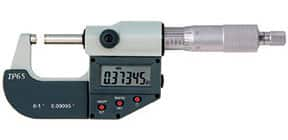

In [2]:
Image('https://cdn.mscdirect.com/global/media/images/tech-essentials/outside-micrometer.jpg')

In [3]:
import numpy as np

### We performed multiple measurements and checked that the histogram is close to normal distribution

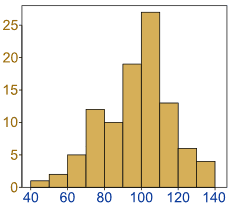

In [4]:
Image('https://www.mathsisfun.com/data/images/histogram.gif')

In [5]:
N = 40 # 40 measurements
mean_x = 0.12621 # inch
s_x = 0.000146317 # inch
t_39_95 = 2.02268893 # t-statistic for N-1 degrees of freedom
true_x = 0.12620 # inch - true value for calibration

$$ e_{\text{bias}} = | \overline{x} - x_{\text{true}} | $$

In [6]:
# bias error
e_bias  = np.abs(mean_x - true_x)
print(f"Bias error = {e_bias:g} inch")

Bias error = 1e-05 inch


$$ e_{\text{precision}} = t_{39,95\%} \frac{S_x}{\sqrt{N}} $$ 

In [7]:
# precision error
e_precision = t_39_95*s_x/np.sqrt(N)
print(f"Precision error = {e_precision:g} inch")

Precision error = 4.67944e-05 inch


$$ e_{\text{resolution}} = \frac{1}{2} \text{resolution} $$

In [8]:
# micrometer resolution
resolution = 0.00005 # inch

e_resolution = resolution/2
print(f"Resolution error = {e_resolution:g} inch")

Resolution error = 2.5e-05 inch


## Standard gage blocks are not ideal, they have known tolerances and errors

$$ e_{\text{standard, total}} = \sqrt{e_{\text{standard},L}^2 + e_{\text{standard},\perp}^2 e_{\text{standard},\parallel}^2 } $$

In [9]:
# Manufacturer supplied information about the gage 
# accuracy. We have chosen only grade 2 accuracy ( higher more expensive )
e_standard_length = 4e-6 # inch
e_standard_flattness = 4e-6 # inch
e_standard_parallelism = 4e-6 # inch
e_standard_total = np.sqrt(e_standard_length**2  + e_standard_flattness**2 + e_standard_parallelism**2)
print(f"standard gage grade 2 error = {e_standard_total:g} inch")

standard gage grade 2 error = 6.9282e-06 inch


$$ \large{e_{\text{calibration, total}} = \sqrt{e_{\text{bias}}^2 + e_{\text{precision}}^2 + e_{\text{standard, total}}^2 + e_{\text{resolution}}^2 } }$$

In [10]:
# note that even if we'd use an ideal measurement system with e = 0
# we will never get the true value as there uncertainty of the standard gage block itself

# note that standard gage block uncertainty is smaller than other values
# otherwise you need to choose a better grade of the gage block

e_calibration_total = np.sqrt(e_bias**2 + e_precision**2 + e_standard_total**2 + e_resolution**2)

In [11]:
print(f"Calibration error = {e_calibration_total:g} inch")

Calibration error = 5.44308e-05 inch


### Accuracy is mesured relative to the true value

$$ \text{accuracy} = 1 - \frac{e_{\text{calibration,total}}}{x_{\text{true}} }   \times 100\% $$

In [12]:
# our accuracy measure is 
accuracy = (1 - e_calibration_total/true_x)
print(f"Accuracy (relative) = {accuracy*100:.3f} %")

Accuracy (relative) = 99.957 %


In [13]:
# from this moment and on we can use the micrometer, but we have to use its # calibration error as a bias error for all the measurements
# remember that it already includes the resolution error, so don't repeat it. 

# Second half: use the calibrated micrometer to measure the diameter of a cylinder

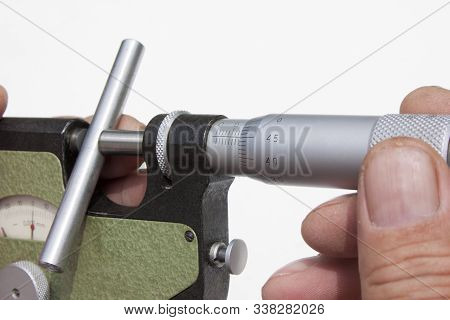

In [14]:
Image('https://static1.bigstockphoto.com/8/3/3/large2/338282026.jpg')

In [15]:
d_mean = 0.32512 # inch
N = 40
s_d = 0.0003 # inch

from scipy.stats import t as student_t
# for the 95 confidence level
confidence_level = 0.95 # 95%
alpha = 1 - confidence_level
degrees_of_freedom = N - 1
t_value = student_t.ppf(1-alpha/2.0, degrees_of_freedom)
print(f"t value = {t_value}")

t value = 2.022690911734728



### Confidence interval of the diameter measurement is:

$$ e_{d,\,\text{cylinder}} = \sqrt{e_{\text{calibration, total}}^2 + \left(t_{39,95\%} \frac{S_x}{\sqrt{N}} \right)^2 } $$

In [16]:
e_cylinder = np.sqrt( e_calibration_total**2 + t_value*s_d/np.sqrt(N))
print(f"e_cylinder = {e_cylinder:g} inch with 95% probability")

e_cylinder = 0.00979529 inch with 95% probability


In [17]:
e_cylinder/2

0.004897642723035386

## Cylinder diameter is 

$$ d_{\text{cylinder}} = 0.325 \pm 0.00489 \;\text{inch} $$